In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [40]:
df = pd.read_csv('data.csv')

In [41]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [42]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [43]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Thus there is no missing values that need to handle

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [45]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [46]:
df['Over18'].unique() # Useless (Everyone over 18)
df['EmployeeCount'].unique() # Useless (Only 1)
df['StandardHours'].unique() # Useless (Everyone 80 hours)

array([80], dtype=int64)

In [47]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

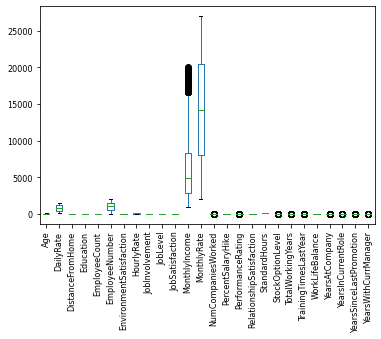

In [48]:
num_var = ['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement',
'JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

boxplot = df.boxplot(column = num_var, grid=False, rot=90, fontsize=8)  


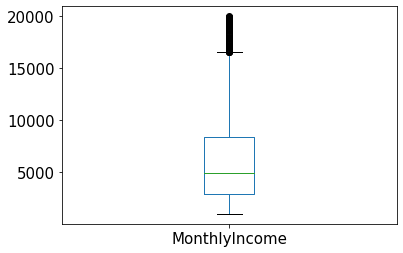

In [49]:
num_var_ = ['MonthlyIncome']
boxplot = df.boxplot(column = num_var_, grid=False, rot=0, fontsize=15)  

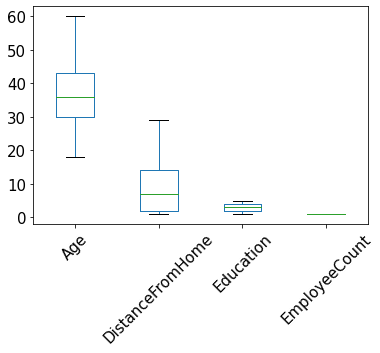

In [50]:
num_1 = ['Age','DistanceFromHome','Education','EmployeeCount']
boxplot = df.boxplot(column = num_1, grid=False, rot=45, fontsize=15)  

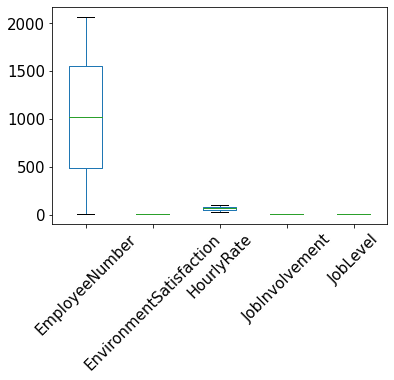

In [51]:
num_2 = ['EmployeeNumber','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel']
boxplot = df.boxplot(column = num_2, grid=False, rot=45, fontsize=15)  

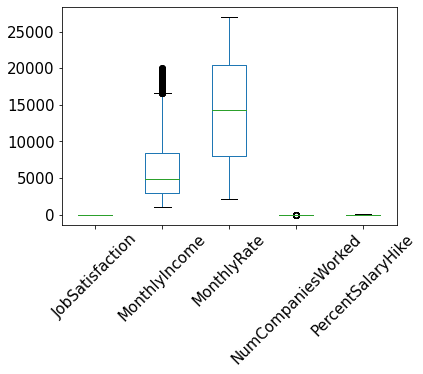

In [52]:
num_3 = ['JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3, grid=False, rot=45, fontsize=15)  

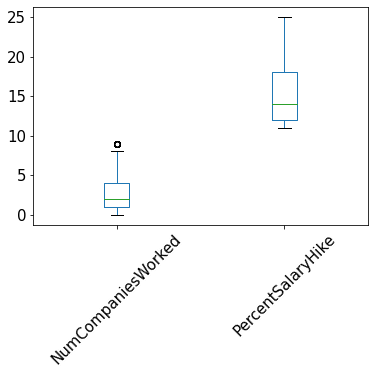

In [53]:
num_3_ = ['NumCompaniesWorked','PercentSalaryHike']
boxplot = df.boxplot(column = num_3_, grid=False, rot=45, fontsize=15)  

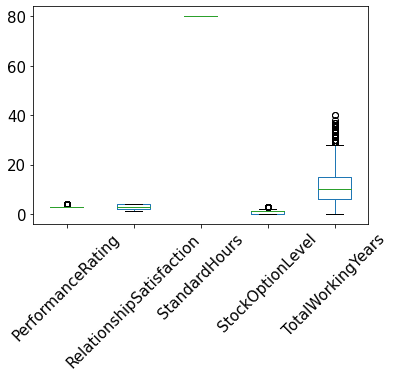

In [54]:
num_4 = ['PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4, grid=False, rot=45, fontsize=15)  

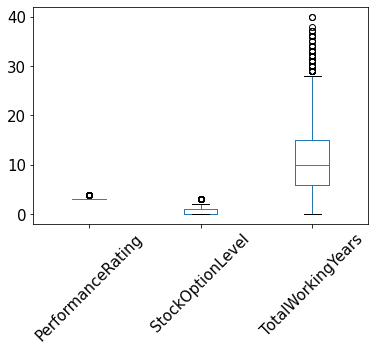

In [55]:
num_4_ = ['PerformanceRating','StockOptionLevel', 'TotalWorkingYears']
boxplot = df.boxplot(column = num_4_, grid=False, rot=45, fontsize=15)  

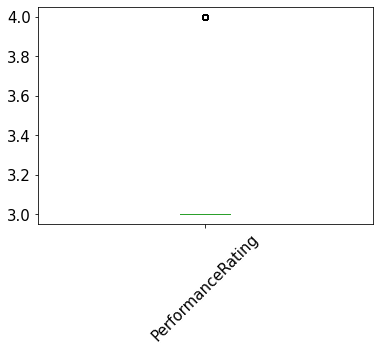

In [56]:
num_4__ = ['PerformanceRating']
boxplot = df.boxplot(column = num_4__, grid=False, rot=45, fontsize=15)  

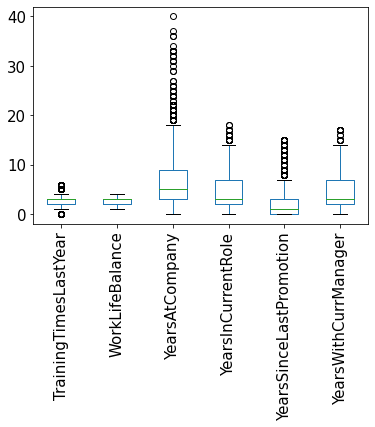

In [57]:
num_5 = ['TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
boxplot = df.boxplot(column = num_5, grid=False, rot=90, fontsize=15)  

In [58]:
# Outliers: [MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager] 

Text(0.5, 1.0, 'Attrition')

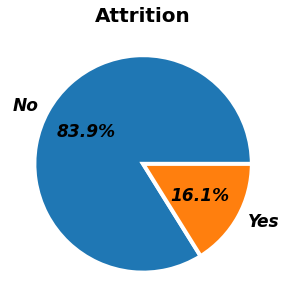

In [59]:
plt.figure(figsize=(5,5))
explode_val = (0,0.4,0,0.1)
df.groupby('Attrition')['Age'].count().plot(kind='pie',autopct='%1.1f%%', ylabel='', wedgeprops={'linewidth': 4.0, 'edgecolor':'white'}, textprops={'fontsize':17,'style':'italic','fontweight':'bold'})
plt.title('Attrition', fontsize=20, fontweight='bold')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

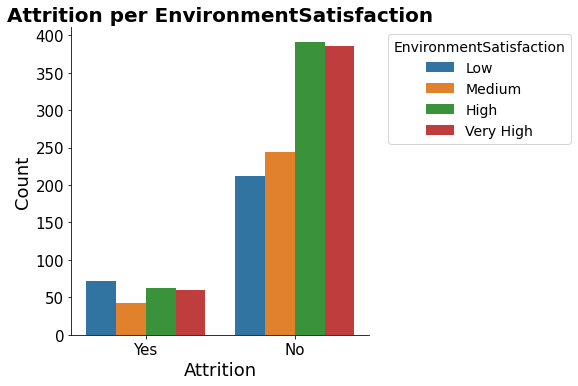

In [60]:
sns.catplot(x = 'Attrition', hue = 'EnvironmentSatisfaction', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='EnvironmentSatisfaction', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14, labels=['Low','Medium','High','Very High'])
plt.title('Attrition per EnvironmentSatisfaction', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

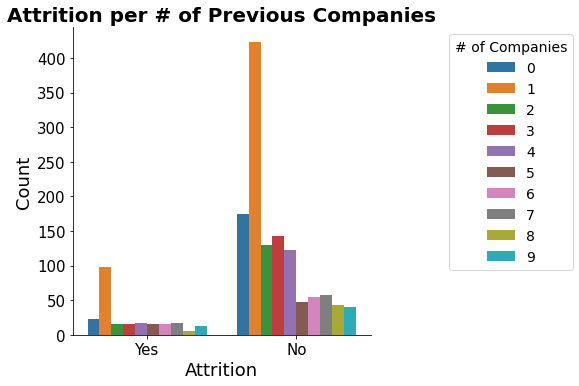

In [61]:
sns.catplot(x = 'Attrition', hue = 'NumCompaniesWorked', data=df, kind='count', legend='')

plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='# of Companies', loc='upper right', bbox_to_anchor =(1.1, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per # of Previous Companies', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

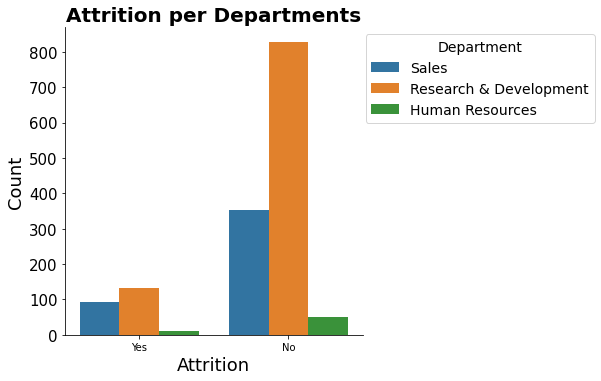

In [62]:
sns.catplot(x = 'Attrition', hue = 'Department', data=df, kind='count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Department', loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per Departments', fontsize=20, fontweight='bold')
plt.yticks(fontsize=15)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000')])

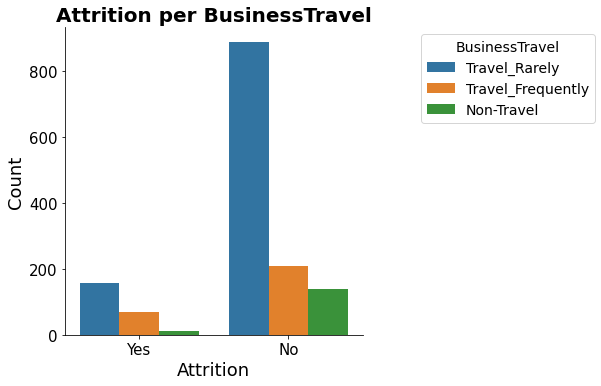

In [63]:
sns.catplot(x = 'Attrition', hue = 'BusinessTravel', data = df, kind = 'count', legend='')
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.legend(title='BusinessTravel',loc='upper right', bbox_to_anchor =(1.2, 0.5, 0.6, 0.5), fontsize=14, title_fontsize=14)
plt.title('Attrition per BusinessTravel', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Text(0.5, 1.0, 'Attrition per Education')

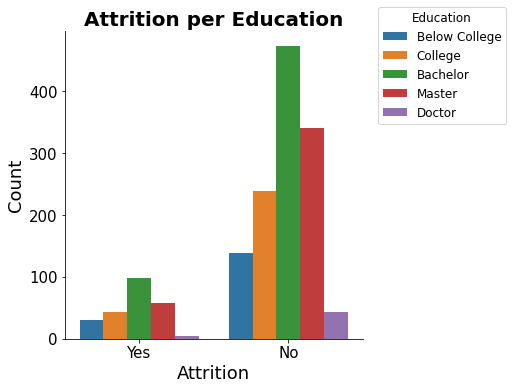

In [64]:
sns.catplot(x = 'Attrition', hue = 'Education', data = df, kind = 'count', legend = '')
plt.legend(title='Education', loc='upper right',labels=['Below College','College','Bachelor','Master','Doctor'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=12, title_fontsize=12)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Education', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per Gender')

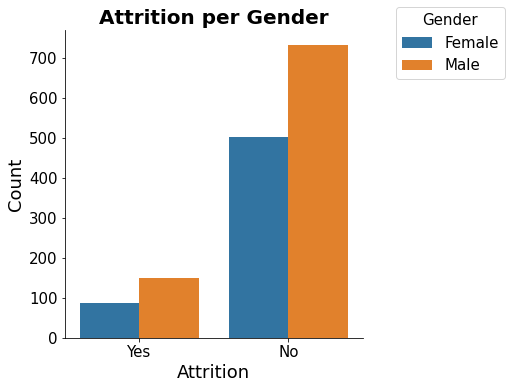

In [65]:
sns.catplot(x = 'Attrition', hue = 'Gender', data = df, kind = 'count', legend='')

plt.legend(title='Gender', loc='upper right',labels=['Female','Male'],bbox_to_anchor =(1.2, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per Gender', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per JobSatisfaction')

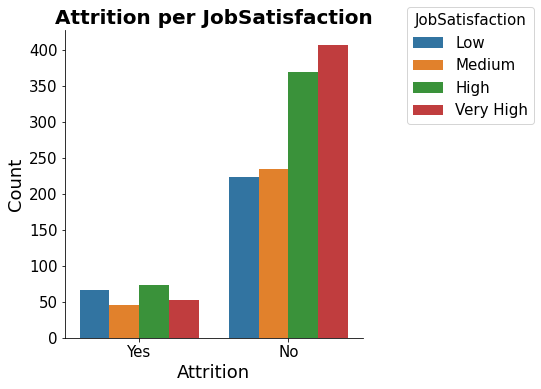

In [66]:
sns.catplot(x = 'Attrition', hue = 'JobSatisfaction', data = df, kind = 'count', legend='')

plt.legend(title='JobSatisfaction', loc='upper right',labels=['Low','Medium','High', 'Very High'],bbox_to_anchor =(1.3, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per JobSatisfaction', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per PerformanceRating')

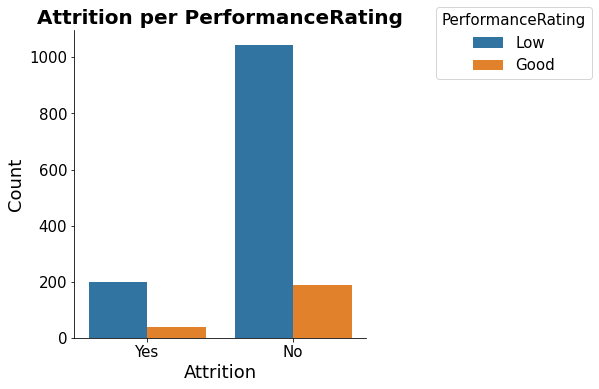

In [67]:
sns.catplot(x = 'Attrition', hue = 'PerformanceRating', data = df, kind = 'count', legend='')

plt.legend(title='PerformanceRating', loc='upper right',labels=['Low','Good'],bbox_to_anchor =(1.5, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per PerformanceRating', fontsize=20, fontweight='bold')

Text(0.5, 1.0, 'Attrition per WorkLifeBalance')

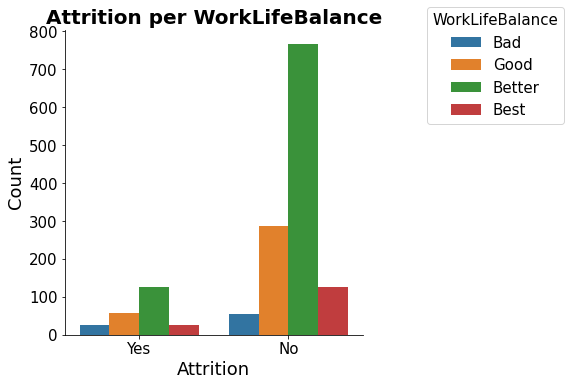

In [68]:
sns.catplot(x = 'Attrition', hue = 'WorkLifeBalance', data = df, kind = 'count', legend='')

plt.legend(title='WorkLifeBalance', loc='upper right',labels=['Bad','Good','Better','Best'], bbox_to_anchor =(1.4, 0.6, 0.3, 0.5), fontsize=15, title_fontsize=15)
plt.xlabel('Attrition', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Attrition per WorkLifeBalance', fontsize=20, fontweight='bold')

# Feature selection and prepocessing

In [4]:
#features below are useless as proven by EDA steps hence we drop those four features
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)
df.drop('StandardHours', axis=1, inplace=True)

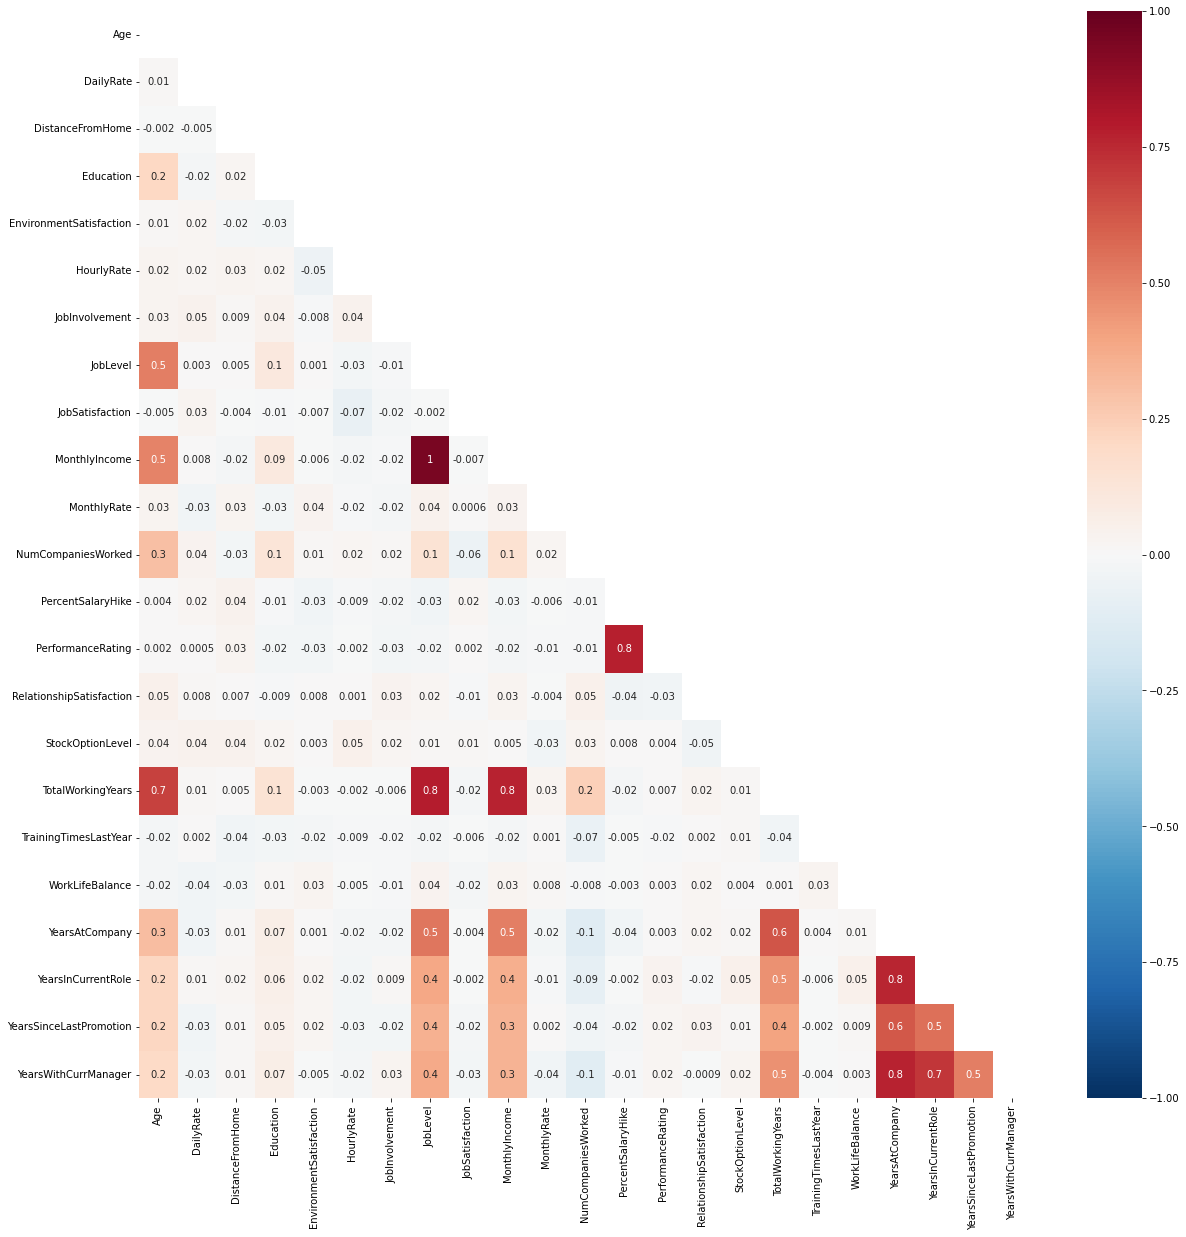

In [5]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

Some other conclusions we get from the correlation table:

1. Job level and total working years are highly correlated.
2. Monthly Income and total working years are highly correlated.
3. Performance rating and percentage salary hike are highly correlated.
4. Years in current role and years at company are highly correlated.
5. Years with current manager and years at company are highly correlated.
6. Monthly income and job level highly correlated

In [6]:
# Recode the figures back to categories for categorical features

df['Education'] = df['Education'].map({1 : 'Below College',2 : 'College',3 : 'Bachelor',4 : 'Master',5 : 'Doctor'})
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
df['JobInvolvement'] = df['JobInvolvement'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
df['JobSatisfaction'] = df['JobSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map({1 : 'Low',2 : 'Medium',3 : 'High',4 : 'Very High'})
df['PerformanceRating'] = df['PerformanceRating'].map({1 : 'Low',2 : 'Good',3 : 'Excellent',4 : 'Outstanding'})
df['WorkLifeBalance'] = df['WorkLifeBalance'].map({1 : 'Bad',2 : 'Good',3 : 'Better',4 : 'Best'})
df['Attrition'] = np.where(df['Attrition']=='Yes',1,0)
df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                    1        College  Life Sciences                  Medium   
1                    8  Below College  Life Sciences                    High   
2                    2        College          Other               Very High   
3                    3         Master  Life Sciences               Very High   
4                    2  Below College        Medical                     Low   
...                ...            ...            ...                     ...   
1465                23        College        Medical                    High   
1466                 6  Below College        Medical               Very High   
1467                 4       Bachelor  Life Sciences                  Medium   
1468                 2       Bachelor        Medical               Very High   
1469                 8       Bachelor        Medical                  Medium   

      Gender  ...  PerformanceRating RelationshipSatisfaction  \
0     Female  ...          Excellent                      Low   
1       Male  ...        Outstanding                Very High   
2       Male  ...          Excellent                   Medium   
3     Female  ...          Excellent                     High   
4       Male  ...          Excellent                Very High   
...      ...  ...                ...                      ...   
1465    Male  ...          Excellent                     High   
1466    Male  ...          Excellent                      Low   
1467    Male  ...        Outstanding                   Medium   
1468    Male  ...          Excellent                Very High   
1469    Male  ...          Excellent                      Low   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
0                    0                 8                     0   
1                    1                10                     3   
2                    0                 7                     3   
3                    0                 8                     3   
4                    1                 6                     3   
...                ...               ...                   ...   
1465                 1                17                     3   
1466                 1                 9                     5   
1467                 1                 6                     0   
1468                 0                17                     3   
1469                 0                 6                     3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                Bad               6                   4   
1             Better              10                   7   
2             Better               0                   0   
3             Better               8                   7   
4             Better               2                   2   
...              ...             ...                 ...   
1465          Better               5                   2   
1466          Better               7                  

### New FE methods

- Standardize numerical features
- Use get dummies encoding for all categorical methods

In [7]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

In [8]:
# Numerical features 
numerical = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','NumCompaniesWorked',
'PercentSalaryHike','TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
# Categorical features 
categorical = X.columns.difference(numerical)

In [9]:
# Handle categorical features before train-test split using get_dummies
# Note that get_dummies return the same result as One Hot Encoding
X = pd.get_dummies(X,columns=categorical)
X

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0      41       1102                 1          94           5993   
1      49        279                 8          61           5130   
2      37       1373                 2          92           2090   
3      33       1392                 3          56           2909   
4      27        591                 2          40           3468   
...   ...        ...               ...         ...            ...   
1465   36        884                23          41           2571   
1466   39        613                 6          42           9991   
1467   27        155                 4          87           6142   
1468   49       1023                 2          63           5390   
1469   34        628                 8          82           4404   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0           19479                   8                 11                  8   
1           24907                   1                 23                 10   
2            2396                   6                 15                  7   
3           23159                   1                 11                  8   
4           16632                   9                 12                  6   
...           ...                 ...                ...                ...   
1465        12290                   4                 17                 17   
1466        21457                   4                 15                  9   
1467         5174                   1                 20                  6   
1468        13243                   2                 14                 17   
1469        10228                   2                 12                  6   

      TrainingTimesLastYear  ...  RelationshipSatisfaction_Medium  \
0                         0  ...                                0   
1                         3  ...                                0   
2                         3  ...                                1   
3                         3  ...                                0   
4                         3  ...                                0   
...                     ...  ...                              ...   
1465                      3  ...                                0   
1466                      5  ...                                0   
1467                      0  ...                                1   
1468                      3  ...                                0   
1469                      3  ...                                0   

      RelationshipSatisfaction_Very High  StockOptionLevel_0  \
0                                      0                   1   
1                                      1                   0   
2                                      0                   1   
3                                      0                   1   
4                                      1                   0   
...                                  ...                 ...   
1465                                   0                   0   
1466                                   0                   0   
1467                                   0                   0   
1468                                   1                   1   
1469                                   0                   1   

      StockOptionLevel_1  StockOptionLevel_2  StockOptionLevel_3  \
0                      0                   0                   0   
1                      1                   0                   0   
2                      0                   0                   0   
3                      0                   0                   0   
4                      1                   0                   0   
...                  ...                 ...                 ...   
1465                   1                   0                   0   
1466                   1                   0                   0   
1467              

#### Prepare preprocessed data for train-test split

In [10]:
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 199
Train attrition class = 977
Test attrition class = 38
Test attrition class = 256


In [11]:
# Standardization for numerical features
scaler = StandardScaler()

X_train[numerical]=scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.fit_transform(X_test[numerical])

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check class imbalance in set
print('Train attrition class = {}'.format(sum(y_train == 1)))
print('Train attrition class = {}'.format(sum(y_train == 0)))
print('Test attrition class = {}'.format(sum(y_test == 1)))
print('Test attrition class = {}'.format(sum(y_test == 0)))

Train attrition class = 977
Train attrition class = 977
Test attrition class = 38
Test attrition class = 256


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

#basic logistic regression model
clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.891156462585034
report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94       256
           1       0.61      0.45      0.52        38

    accuracy                           0.89       294
   macro avg       0.76      0.70      0.73       294
weighted avg       0.88      0.89      0.88       294

ROC-AUC score0.8441611842105263
Confusion Matrix : 
[[245  11]
 [ 21  17]]


In [14]:
from xgboost import XGBClassifier
XGBoost = XGBClassifier(objective='binary:logistic',random_state=0,n_jobs=-1,use_label_encoder=False, eval_metric = 'aucpr') #, tree_method = 'gpu_hist'
param ={
    'reg_lambda': [0, 1e-1, 1, 10, 50],
    'n_estimators':range(100,1500,300),
    'eta':np.linspace(0.1,0.7,3),
}
# gs = GridSearchCV(estimator=finalPipe,param_grid=param,scoring = 'neg_root_mean_squared_error',n_jobs = -1,cv = 5,verbose = -1)
# finalPipe.set_params(gs.best_params_)

In [15]:
XGBoost.fit(X_train,y_train)
y_pred = XGBoost.predict(X_test)
#Accuracy
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('report: ' + str(classification_report(y_test,y_pred)))
#Roc_auc score
print('ROC-AUC score' + str(roc_auc_score(y_test, XGBoost.predict_proba(X_test)[:,1])))
#Confusion metrics
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8571428571428571
report:               precision    recall  f1-score   support

           0       0.92      0.91      0.92       256
           1       0.45      0.47      0.46        38

    accuracy                           0.86       294
   macro avg       0.69      0.69      0.69       294
weighted avg       0.86      0.86      0.86       294

ROC-AUC score0.7737458881578947
Confusion Matrix : 
[[234  22]
 [ 20  18]]


## Global Surrogate Model

In [16]:
# Create predicted y value from XGBoost model trained earlier 
prediction = XGBoost.predict(X_train)

# Use the predicted value with original X_train data to fit a simple decision tree
from sklearn import tree

dt = tree.DecisionTreeClassifier().fit(X_train,prediction)

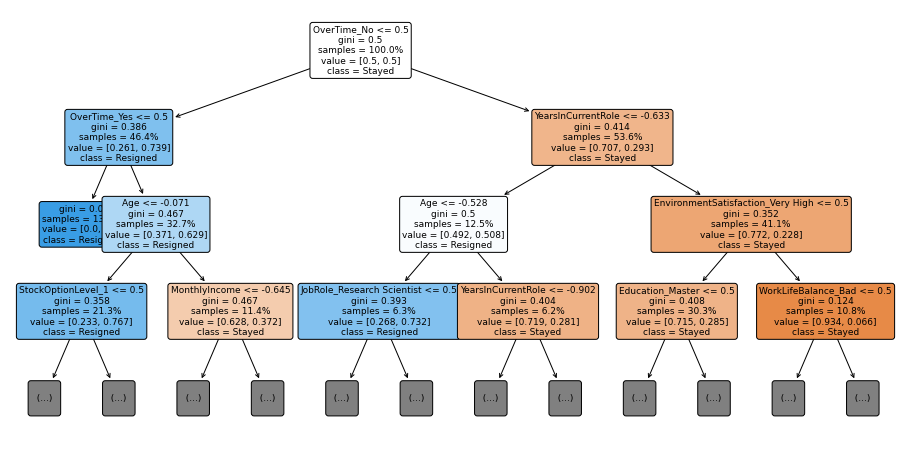

In [17]:
# visualization the global surrogate decition tree model with max_depth = 3
fig = plt.figure(figsize=(16, 8))
vis = tree.plot_tree(dt, feature_names = X_train.columns, class_names = ['Stayed', 'Resigned'], max_depth=3, fontsize=9, proportion=True, filled=True, rounded=True) 

In [18]:
# Assess how well the global surrogate model reproduce the results from original XGBoost model on train dataset
dt.score(X_train,prediction) 

1.0

In [19]:
# Assess how well the global surrogate model reproduce the results from original XGBoost model on train dataset

test_pred = XGBoost.predict(X_test)
dt.score(X_test,test_pred) 

0.7857142857142857

## Feature Importance

In [20]:
x = X_test
y = y_test

Text(0.5, 0, 'Xgboost Feature Importance')

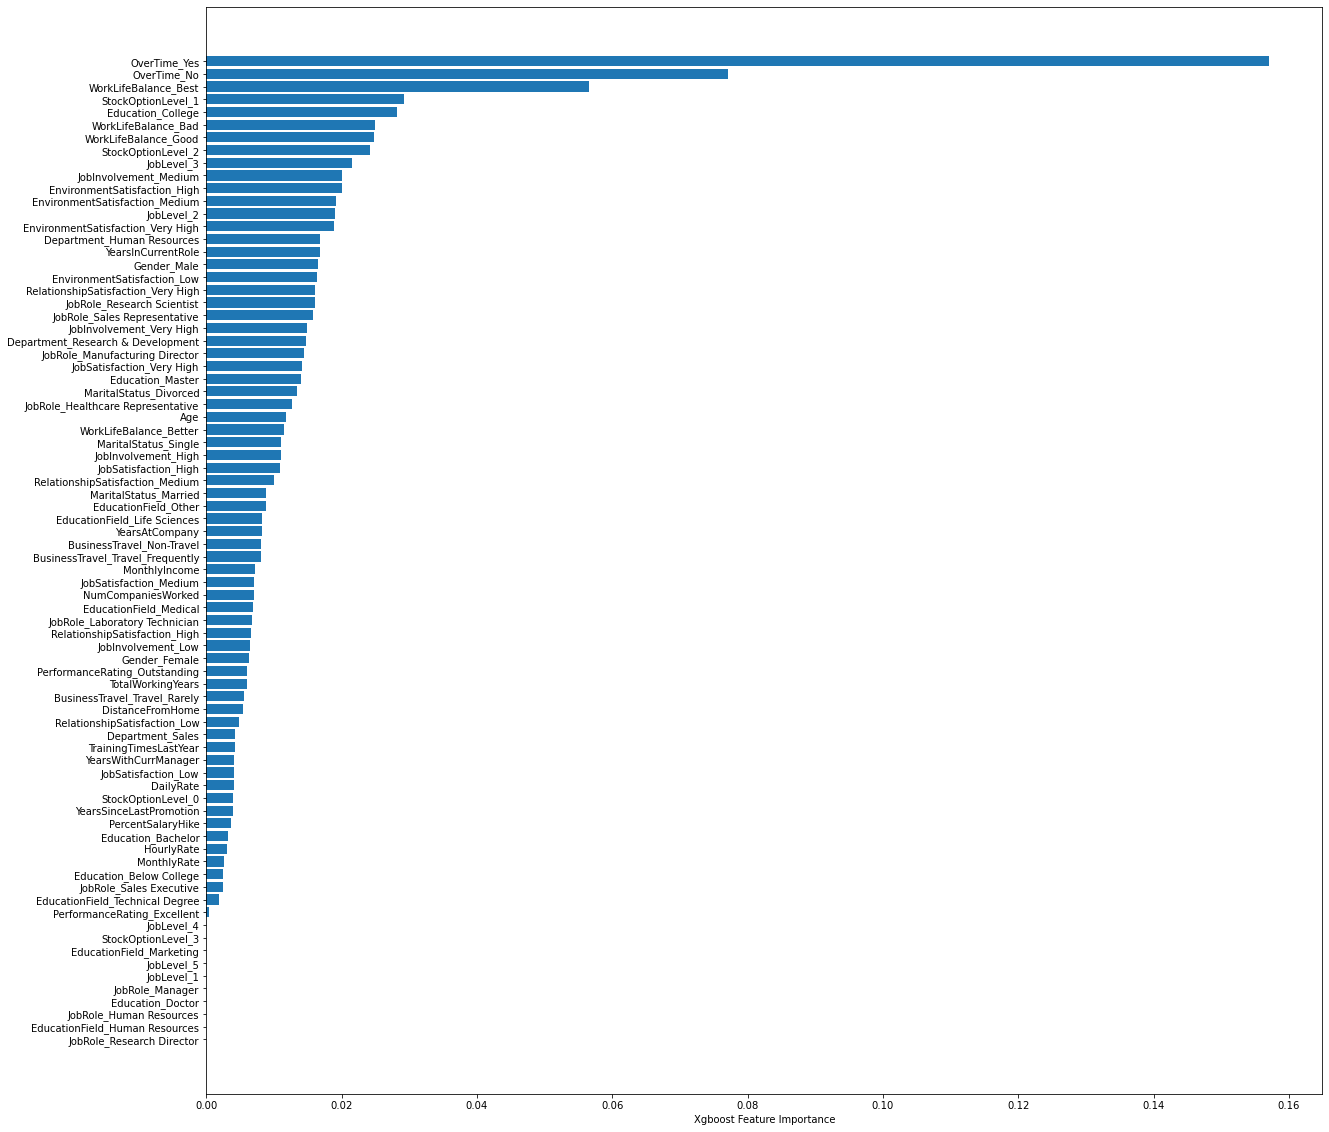

In [69]:
sorted_idx = XGBoost.feature_importances_.argsort()
plt.figure(figsize=(20,20))
plt.barh(x.columns[sorted_idx], XGBoost.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

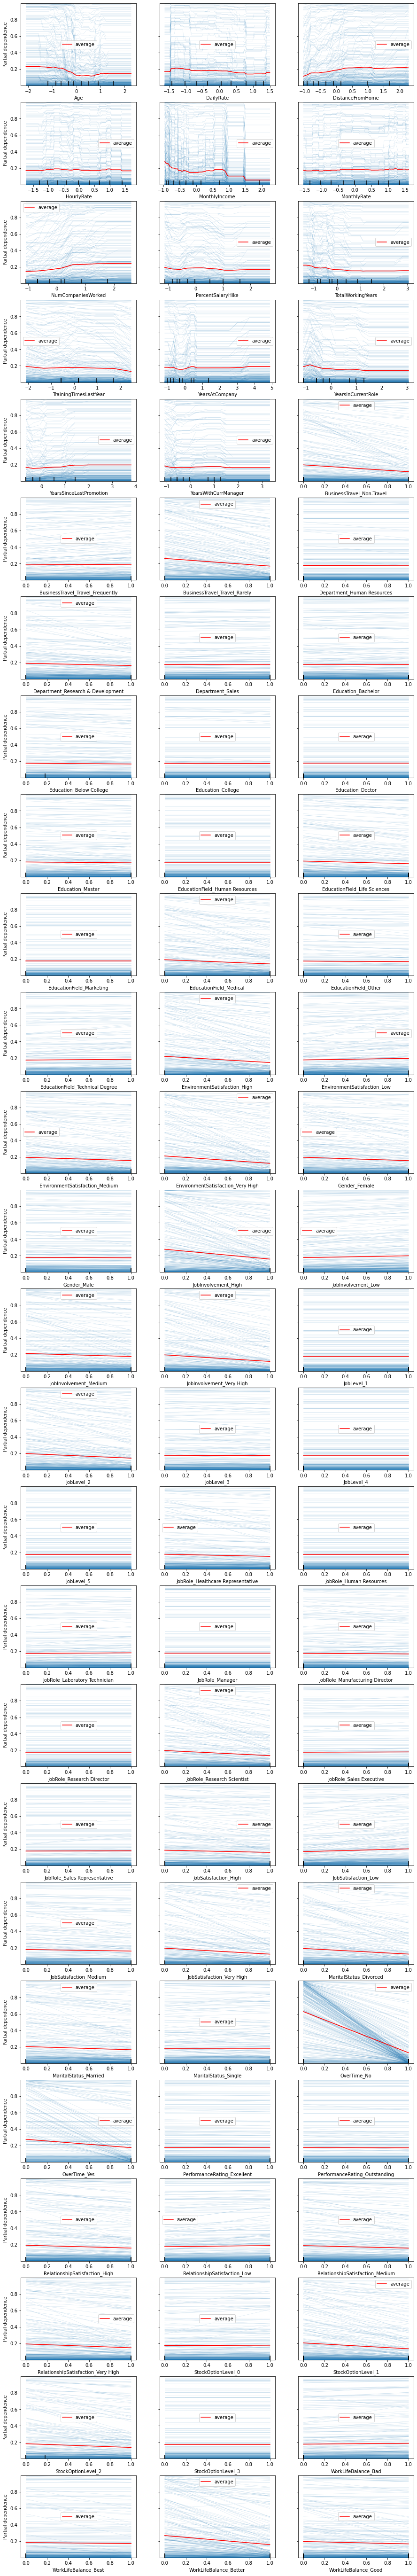

In [22]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(15, 100))
PartialDependenceDisplay.from_estimator(XGBoost, x, features=x.columns, kind ='both',ax=ax,line_kw={"color": "red"},ice_lines_kw={"color": "tab:blue", "alpha": 0.2, "linewidth": 0.5},n_jobs=-1)

In [23]:
import shap

In [24]:
f = lambda x: XGBoost.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X.iloc[0:1000,:])

Permutation explainer: 1001it [01:00, 13.82it/s]                         


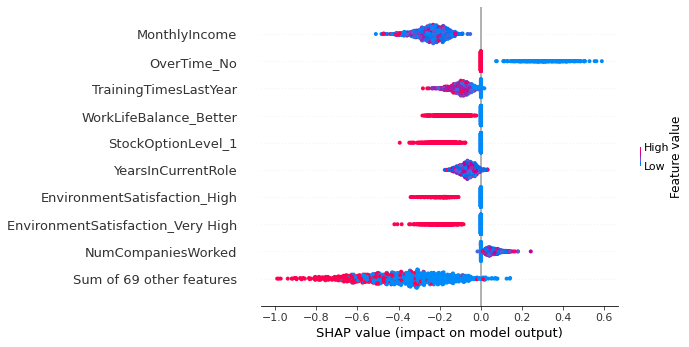

In [25]:
shap.plots.beeswarm(shap_values)

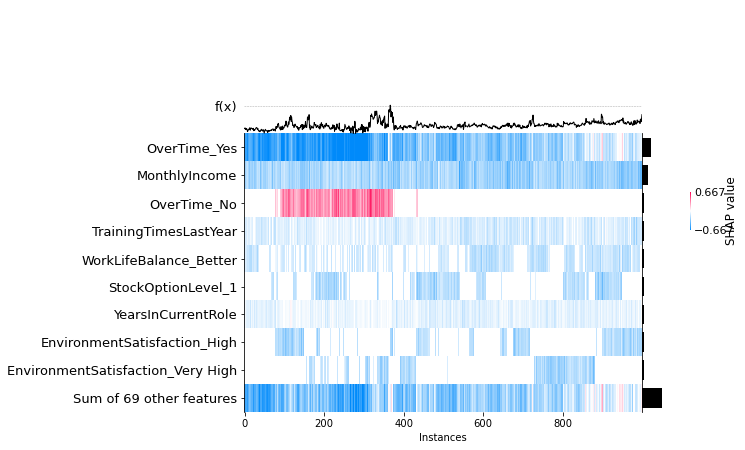

In [26]:
shap.plots.heatmap(shap_values)

In [77]:
y_test.iloc[0]

1

In [27]:
shap.initjs()
explainer = shap.KernelExplainer(XGBoost.predict_proba, x)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])

Using 294 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [28]:
shap.initjs()
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/294 [00:00<?, ?it/s]

## LIME Explanations
LIME generates local explanations, in other words, explanations for individual instances in a dataset. LIME starts by generating a new dataset of perturbations around the instance to be explained. Then, the trained machine learning classifier is used to predict the class of each instance in the new generated dataset. Finally, a simpler model with intrinsic intepretability, for instance a linear regression model, is fitted and used to explain the prediction of the classifier. Before fitting a simpler model, the instances in the new generated dataset are weighed based on their distance to the original instance being explained. In this way, there is a higher certainty that the model is locally faithful around the explained instance. 

### 1. Import LIME package

In [110]:
# pip install lime

In [29]:
 import lime
import lime.lime_tabular

### 2. Create the Explainer

In [30]:
predict_fn_rf = lambda x: XGBoost.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Will leave','Will not Leave'],kernel_width=5)

### 3. Use the explainer to explain predictions

In [31]:
X_test.head(5)

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
42   -1.264357   1.290790          1.810475   -0.851827      -0.923297   
76   -0.327508  -0.125735         -1.042296   -1.635209      -0.520676   
1380 -0.327508  -0.354915          0.978416    0.274283      -0.271606   
252  -0.952074  -0.396362          0.621820   -0.264291      -0.913925   
388   0.401153  -1.527632         -1.042296    1.449356      -0.866862   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
42      -0.505937           -0.669726          -0.857382          -1.321456   
76       1.272164           -1.078231          -0.307610           0.504240   
1380     0.267219           -1.078231           0.242161          -0.712891   
252      1.223209           -0.669726           1.066819          -0.712891   
388      0.911634            0.147284           0.242161          -0.469465   

      TrainingTimesLastYear  ...  RelationshipSatisfaction_Medium  \
42                -0.578860  ...                                0   
76                -0.578860  ...                                1   
1380              -0.578860  ...                                0   
252               -1.338613  ...                                0   
388                1.700400  ...                                1   

      RelationshipSatisfaction_Very High  StockOptionLevel_0  \
42                                     0                   1   
76                                     0                   1   
1380                                   1                   0   
252                                    0                   1   
388                                    0                   0   

      StockOptionLevel_1  StockOptionLevel_2  StockOptionLevel_3  \
42                     0                   0                   0   
76                     0                   0                   0   
1380                   1                   0                   0   
252                    0                   0                   0   
388                    1                   0                   0   

      WorkLifeBalance_Bad  WorkLifeBalance_Best  WorkLifeBalance_Better  \
42                      0                     0                       0   
76                      0                     0                       1   
1380                    1                     0                       0   
252                     0                     0                       1   
388                     0                     0                       1   

      WorkLifeBalance_Good  
42                       1  
76                       0  
1380                     0  
252                      0  
388                      0  

[5 rows x 78 columns]

In [32]:
choosen_instance = X_test.loc[[42]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

# To be updated -> Interpretation:

The model predicts 100% probability of that the employee will not have attrition.Biggest effect is his job level is 1.0; This has decreased his chances of leaving significantly. Next, the person has an environment satisfaction of 1.00 which increased his chance of staying.

In [33]:
choosen_instance = X_test.loc[[1380]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=10)
exp.show_in_notebook(show_all=False)

Interpretation

The model predicts 90% probability of that the employee will have attrition.Biggest effect is his job research scientist is 0.0; This has increased his chances of leaving significantly.